In [2]:
%reload_ext autoreload
%autoreload 2
%matplotlib inline

In [3]:
from fastai import *
from fastai.vision import *

# get data

In [4]:
path = untar_data(URLs.PETS); path

PosixPath('/Users/zhuangxuxia/.fastai/data/oxford-iiit-pet')

In [5]:
help(untar_data)

Help on function untar_data in module fastai.datasets:

untar_data(url:str, fname:Union[pathlib.Path, str]=None, dest:Union[pathlib.Path, str]=None, data=True, force_download=False) -> pathlib.Path
    Download `url` to `fname` if it doesn't exist, and un-tgz to folder `dest`.



In [6]:
path.ls()

[PosixPath('/Users/zhuangxuxia/.fastai/data/oxford-iiit-pet/images'),
 PosixPath('/Users/zhuangxuxia/.fastai/data/oxford-iiit-pet/annotations')]

In [7]:
path_anno = path/'annotations'
path_img = path/'images'

In [8]:
fnames = get_image_files(path_img)
len(fnames)
fnames[:5]

[PosixPath('/Users/zhuangxuxia/.fastai/data/oxford-iiit-pet/images/Egyptian_Mau_167.jpg'),
 PosixPath('/Users/zhuangxuxia/.fastai/data/oxford-iiit-pet/images/pug_52.jpg'),
 PosixPath('/Users/zhuangxuxia/.fastai/data/oxford-iiit-pet/images/basset_hound_112.jpg'),
 PosixPath('/Users/zhuangxuxia/.fastai/data/oxford-iiit-pet/images/Siamese_193.jpg'),
 PosixPath('/Users/zhuangxuxia/.fastai/data/oxford-iiit-pet/images/shiba_inu_122.jpg')]

In [9]:
get_image_files??

Signature:
get_image_files(
    c:Union[pathlib.Path, str],
    check_ext:bool=True,
    recurse=False,
) -> Collection[pathlib.Path]
Source:   
def get_image_files(c:PathOrStr, check_ext:bool=True, recurse=False)->FilePathList:
    "Return list of files in `c` that are images. `check_ext` will filter to `image_extensions`."
    return get_files(c, extensions=(image_extensions if check_ext else None), recurse=recurse)
File:      /anaconda3/lib/python3.6/site-packages/fastai/vision/data.py
Type:      function


In [13]:
get_files??

Signature:
get_files(
    path:Union[pathlib.Path, str],
    extensions:Collection[str]=None,
    recurse:bool=False,
    include:Union[Collection[str], NoneType]=None,
) -> Collection[pathlib.Path]
Source:   
def get_files(path:PathOrStr, extensions:Collection[str]=None, recurse:bool=False,
              include:Optional[Collection[str]]=None)->FilePathList:
    "Return list of files in `path` that have a suffix in `extensions`; optionally `recurse`."
    if recurse:
        res = []
        for i,(p,d,f) in enumerate(os.walk(path)):
            # skip hidden dirs
            if include is not None and i==0:  d[:] = [o for o in d if o in include]
            else:                             d[:] = [o for o in d if not o.startswith('.')]
            res += _get_files(path, p, f, extensions)
        return res
    else:
        f = [o.name for o in os.scandir(path) if o.is_file()]
        return _get_files(path, path, f, extensions)
File:      /anaconda3/lib/python3.6/site-packages/fas

path_img: a path containing images

fnames: a list of file names

pat: a regular expression (i.e. pattern) to be used to extract the label from the file name

size: what size images do you want to work with.

In [10]:
np.random.seed(2)
pat = r'/([^/]+)_\d+.jpg$'

In [11]:
# An ImageDataBunch represents all of the data you need to build a model and there's some factory 
# method which try to make it really easy for you to create that data bunch - a training set, 
# a validation set with images and labels.
# We are going to use from_name_re to extract thelabels
data = ImageDataBunch.from_name_re(path_img, fnames, pat, ds_tfms=get_transforms(), size=224)
print(imagenet_stats)
print(data.normalize(imagenet_stats))

([0.485, 0.456, 0.406], [0.229, 0.224, 0.225])
ImageDataBunch;

Train: LabelList (5912 items)
x: ImageList
Image (3, 224, 224),Image (3, 224, 224),Image (3, 224, 224),Image (3, 224, 224),Image (3, 224, 224)
y: CategoryList
Egyptian_Mau,pug,basset_hound,Siamese,Birman
Path: /Users/zhuangxuxia/.fastai/data/oxford-iiit-pet/images;

Valid: LabelList (1478 items)
x: ImageList
Image (3, 224, 224),Image (3, 224, 224),Image (3, 224, 224),Image (3, 224, 224),Image (3, 224, 224)
y: CategoryList
samoyed,pomeranian,Persian,Siamese,Egyptian_Mau
Path: /Users/zhuangxuxia/.fastai/data/oxford-iiit-pet/images;

Test: None


In [12]:
ImageDataBunch??

Init signature:
ImageDataBunch(
    train_dl:torch.utils.data.dataloader.DataLoader,
    valid_dl:torch.utils.data.dataloader.DataLoader,
    fix_dl:torch.utils.data.dataloader.DataLoader=None,
    test_dl:Union[torch.utils.data.dataloader.DataLoader, NoneType]=None,
    device:torch.device=None,
    dl_tfms:Union[Collection[Callable], NoneType]=None,
    path:Union[pathlib.Path, str]='.',
    collate_fn:Callable=<function data_collate at 0x1a22178b70>,
    no_check:bool=False,
)
Source:        
class ImageDataBunch(DataBunch):
    "DataBunch suitable for computer vision."
    _square_show = True

    @classmethod
    def create_from_ll(cls, lls:LabelLists, bs:int=64, val_bs:int=None, ds_tfms:Optional[TfmList]=None,
                num_workers:int=defaults.cpus, dl_tfms:Optional[Collection[Callable]]=None, device:torch.device=None,
                test:Optional[PathOrStr]=None, collate_fn:Callable=data_collate, size:int=None, no_check:bool=False,
                resize_method:ResizeMet

In [39]:
# about normalization:Normalizing the images, we're going to be learning more about later in the course, 
# it means that the pixel values start out from naught to 255.If your data is not normalized, 
#it can be quite difficult for your model to train well.

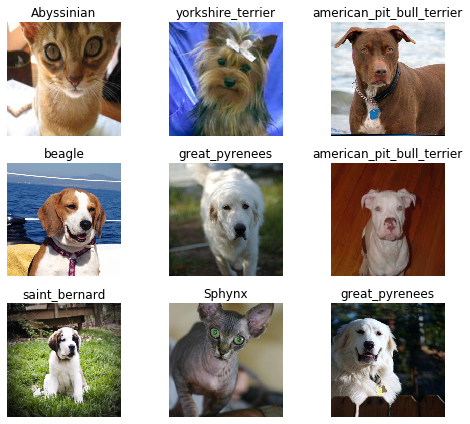

In [40]:
data.show_batch(rows=3, figsize=(7,6))

In [41]:
print(data.classes)
print(len(data.classes))
print(data.c)
#data.c is the number of classes.

['Abyssinian', 'Bengal', 'Birman', 'Bombay', 'British_Shorthair', 'Egyptian_Mau', 'Maine_Coon', 'Persian', 'Ragdoll', 'Russian_Blue', 'Siamese', 'Sphynx', 'american_bulldog', 'american_pit_bull_terrier', 'basset_hound', 'beagle', 'boxer', 'chihuahua', 'english_cocker_spaniel', 'english_setter', 'german_shorthaired', 'great_pyrenees', 'havanese', 'japanese_chin', 'keeshond', 'leonberger', 'miniature_pinscher', 'newfoundland', 'pomeranian', 'pug', 'saint_bernard', 'samoyed', 'scottish_terrier', 'shiba_inu', 'staffordshire_bull_terrier', 'wheaten_terrier', 'yorkshire_terrier']
37
37


# training

In [44]:
learn = create_cnn(data, models.resnet34, metrics=error_rate)
# ResNet works extremely well,there are ResNet34 and ResNet50. smaller one rain faster. 

 number4 in fit_one_cycle decides how many times do we go through the entire dataset, 
how many times do we show the dataset to the model so that it can learn from it. 

In [45]:
learn.fit_one_cycle(4)

epoch,train_loss,valid_loss,error_rate,time
0,1.381625,0.343110,0.099459,22:16
1,0.561582,0.256250,0.083221,22:26
2,0.330123,0.210256,0.070365,54:09
3,0.251836,0.204087,0.066306,21:19


In [46]:
# save coefficients and parameters incase we want to start doing some more playing around and come back later.
#just go learn.save and give it a name
learn.save('stage-1')

Remember a learn object knows two things: 1What's your data  2 What is your model. Now it's not just an architecture, it's actually a trained model

# Interpretation

In [50]:
# class interpretation
interp = ClassificationInterpretation.from_learner(learn)

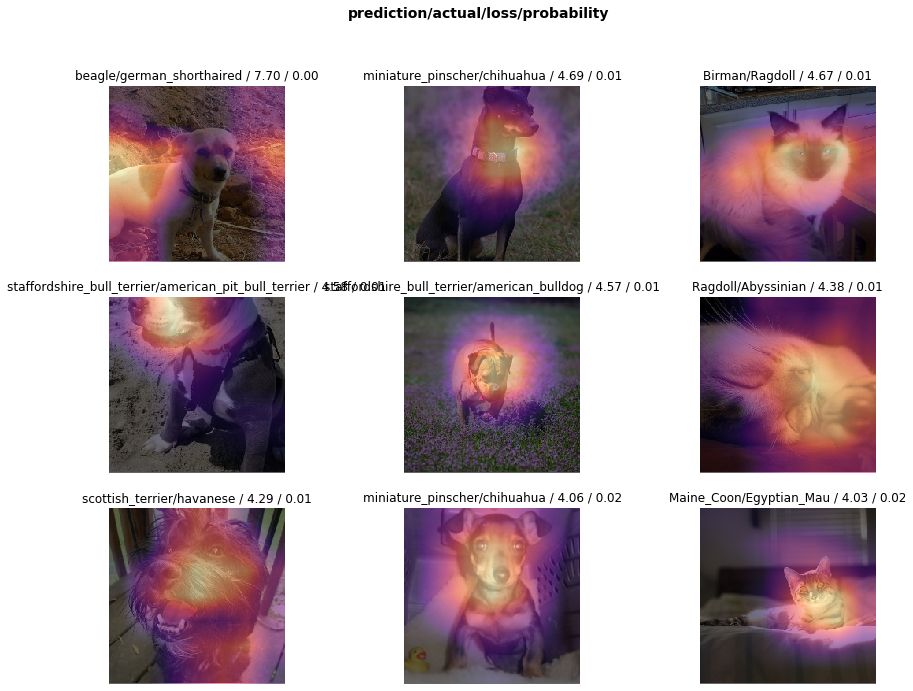

In [51]:
# By plotting the top losses, 
# we are going to find out what were the things that we were the most wrong on, or the most confident about what we got wrong
interp.plot_top_losses(9, figsize=(15,11))

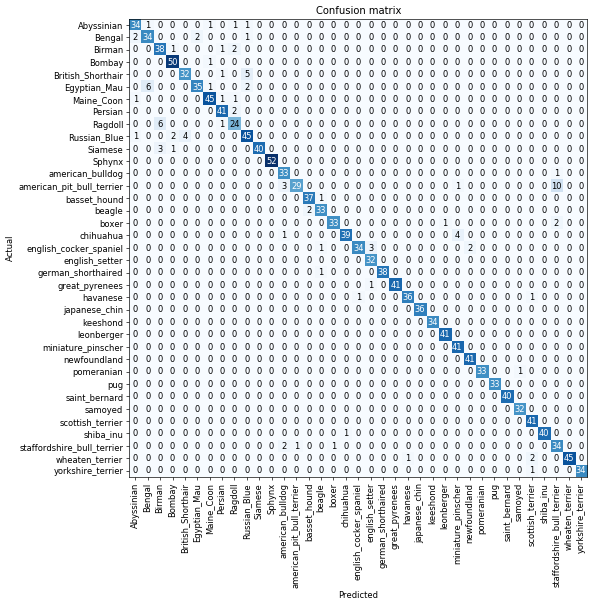

In [55]:
interp.plot_confusion_matrix(figsize = (10,10),dpi = 60)

In [58]:
# ost_confused will simply grab out of 
# the confusion matrix the particular combinations of predicted and actual that got wrong the most often
interp.most_confused(min_val = 2)

[('american_pit_bull_terrier', 'staffordshire_bull_terrier', 10),
 ('Egyptian_Mau', 'Bengal', 6),
 ('Ragdoll', 'Birman', 6),
 ('British_Shorthair', 'Russian_Blue', 5),
 ('Russian_Blue', 'British_Shorthair', 4),
 ('chihuahua', 'miniature_pinscher', 4),
 ('Siamese', 'Birman', 3),
 ('american_pit_bull_terrier', 'american_bulldog', 3),
 ('english_cocker_spaniel', 'english_setter', 3),
 ('Bengal', 'Abyssinian', 2),
 ('Bengal', 'Egyptian_Mau', 2),
 ('Birman', 'Ragdoll', 2),
 ('Egyptian_Mau', 'Russian_Blue', 2),
 ('Persian', 'Ragdoll', 2),
 ('Russian_Blue', 'Bombay', 2),
 ('beagle', 'basset_hound', 2),
 ('boxer', 'staffordshire_bull_terrier', 2),
 ('english_cocker_spaniel', 'newfoundland', 2),
 ('staffordshire_bull_terrier', 'american_bulldog', 2),
 ('wheaten_terrier', 'scottish_terrier', 2)]

# fine-tuning --- make our model better
# Unfreezing, fine-tuning, and learning rates

In [59]:
# before we only trained a few layers so that it can be fast
# unfreeze is the thing that says please train the whole model.
learn.unfreeze()
learn.fit_one_cycle(1)

epoch,train_loss,valid_loss,error_rate,time
0,0.506988,0.310568,0.098106,30:44


In [61]:
# So this is the kind of stuff you've got to get a really good intuitive understanding for. 
# The start of my neural net is going to find very simple gradients and lines, 
# the second layer can find very simple shapes, the third layer can find combination of those.
# Layer 4 can take all the stuff from layer 3 and combine them together. By layer 4, we got something 
# that can find dog faces or bird legs.By layer 5, we've got something that can find the eyeballs of 
# bird and lizards, or faces of particular breeds of dogs and so forth. So you can see how by the time 
# you get to layer 34, you can find specific dog breeds and cat breeds. This is kind of how it works.

In [63]:
# This is why our attempt to fine-tune this model didn't work because by default, 
# it trains all the layers at the same speed which is to say it will update those 
# things representing diagonal lines and gradients just as much as it tries to update 
# the things that represent the exact specifics of what an eyeball looks like, so we have to change that.
# we first of all need to go back to where we were before

In [64]:
learn.load('stage-1')

Learner(data=ImageDataBunch;

Train: LabelList (5912 items)
x: ImageList
Image (3, 224, 224),Image (3, 224, 224),Image (3, 224, 224),Image (3, 224, 224),Image (3, 224, 224)
y: CategoryList
Egyptian_Mau,pug,shiba_inu,Birman,shiba_inu
Path: /Users/zhuangxuxia/.fastai/data/oxford-iiit-pet/images;

Valid: LabelList (1478 items)
x: ImageList
Image (3, 224, 224),Image (3, 224, 224),Image (3, 224, 224),Image (3, 224, 224),Image (3, 224, 224)
y: CategoryList
staffordshire_bull_terrier,Russian_Blue,shiba_inu,British_Shorthair,Maine_Coon
Path: /Users/zhuangxuxia/.fastai/data/oxford-iiit-pet/images;

Test: None, model=Sequential(
  (0): Sequential(
    (0): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
    (1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (2): ReLU(inplace)
    (3): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
    (4): Sequential(
      (0): BasicBlock(
        (conv1): Conv2d(64, 

LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.


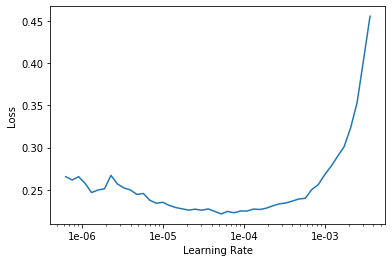

In [65]:
# this is the thing that figures out what is the fastest 
# I can train this neural network at without making it zip off the rails and get blown apart
learn.lr_find()
learn.recorder.plot()
# This will plot the result of our LR finder and 
# what this basically shows you is this key parameter called a learning rate. 

In [68]:
 #The x-axis one here shows me what happens as I increase the learning rate. The y axis show what the loss is

In [69]:
learn.unfreeze()
learn.fit_one_cycle(2, max_lr=slice(1e-6,1e-4))

epoch,train_loss,valid_loss,error_rate,time
0,0.247255,0.195230,0.066982,31:37
1,0.216663,0.191106,0.062923,30:19


In [70]:
#How to pick learning rates after unfreezing?


# A good rule of thumb is after you unfreeze (i.e. train the whole thing),
# pass a max learning rate parameter, pass it a slice, make the second part 
# of that slice about 10 times smaller than your first stage. 

In [71]:
# if I do that, then the error rate gets a bit better. So I would perhaps say for most 
# people most of the time, these two stages are enough to get pretty much a world-class model.

# ResNet50

In [72]:
# We can improve it by using more layers, but since my com doesn't have enough memory so I will not try it 
# data = ImageDataBunch.from_name_re(path_img, fnames, pat, ds_tfms=get_transforms(), size=320, bs=bs//2)
# data.normalize(imagenet_stats)
# learn = ConvLearner(data, models.resnet50, metrics=error_rate)
# learn.fit_one_cycle(8, max_lr=slice(1e-3))

# different ways of creating datasets

path = untar_data(URLs.MNIST_SAMPLE); path

path.ls()

#Scenario 1: Labels are folder names
(path/'train').ls()

tfms = get_transforms(do_flip=False)
data = ImageDataBunch.from_folder(path, ds_tfms=tfms, size=26)
data.show_batch(rows=3, figsize=(5,5))

# Scenario 2: CSV file
df = pd.read_csv(path/'labels.csv')
df.head()

data = ImageDataBunch.from_csv(path, ds_tfms=tfms, size=28)
data.show_batch(rows=3, figsize=(5,5))
data.classes

# Scenario 3: Using regular expression
fn_paths = [path/name for name in df['name']]; fn_paths[:2]
pat = r"/(\d)/\d+\.png$"
data = ImageDataBunch.from_name_re(path, fn_paths, pat=pat, ds_tfms=tfms, size=24)
data.classes

# Scenario 4: Something more complex
data = ImageDataBunch.from_name_func(path, fn_paths, ds_tfms=tfms, size=24,
        label_func = lambda x: '3' if '/3/' in str(x) else '7')
data.classes

# Scenario 5: You need something even more flexible
labels = [('3' if '/3/' in str(x) else '7') for x in fn_paths]
labels[:5]

data = ImageDataBunch.from_lists(path, fn_paths, labels=labels, ds_tfms=tfms, size=24)
data.classes